# End-to-End Project

### This lesson will explore a couple of new topics while also reviewing and applying important lessons from the course. Note that we will skip a few steps.

### Here are the project details:

- We [scraped ALL the PDFs](https://drive.google.com/file/d/1KrRVJTNFdH-jJY7imUsyjkEIpOIDkGrA/view?usp=share_link) from this [State of California Department of Finance site](https://dof.ca.gov/forecasting/economics/economic-and-revenue-updates/).
- Build our code and test it out on a few sample documents to do the following:
    - Convert document content to readable text.
    - Write the regex required to capture the following information:
      - Month and year
      - Alcohol Beverage Forecast
      - Alcohol Beverage Actual
    - Export the captured data into a dataframe and then csv.

The final spreadsheet should look like this abbreviated version:


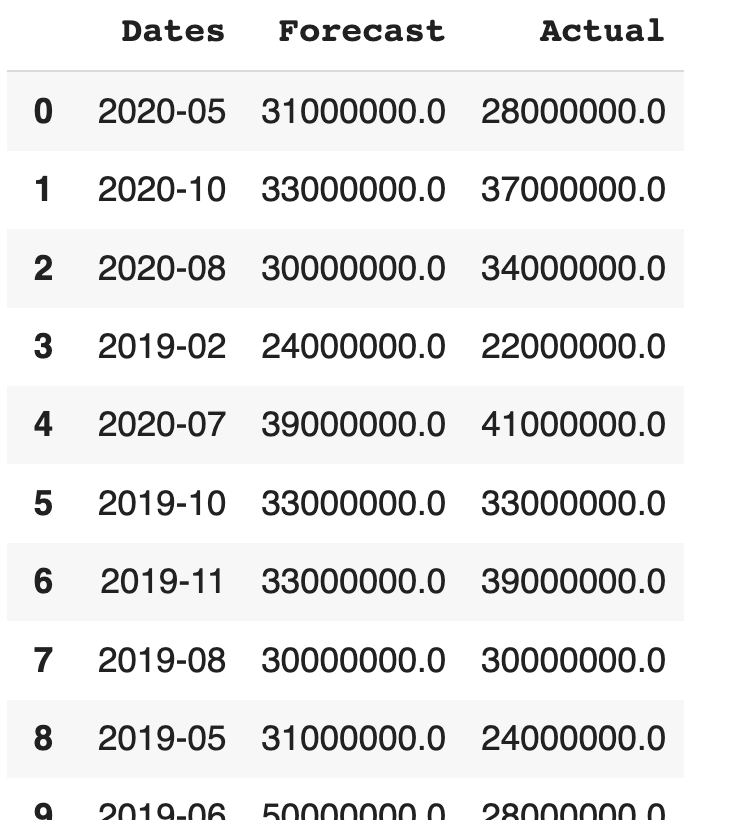

# Step back 1 - Converting PDFs to readable text

- Download these [practice documents](https://drive.google.com/file/d/1aHn65vnmQms2Wk9eoaUt8P1V9sViF7qn/view?usp=share_link).

In [ ]:
## install PyPDF2 as part of our process
## It's not part of the standard library.
!pip install pypdf2

In [ ]:
## Import libraries
## in order to export our file to our computer drive, you need this only in Colab:
import PyPDF2

In [ ]:
## import colab's file uploader
## upload 
files.upload()

## 1. Reading fairly well-behaving non-tabular PDFs


In [ ]:
## READ simple.pdf efficiently
with open("simple.pdf", "rb") as pdf_obj:
  print(pdf_obj)
  my_reader = PyPDF2.PdfFileReader(pdf_obj)
  print(type(my_reader))
  number_pages = my_reader.numPages
  print(number_pages)
  all_pages = []
  for page_number in range(number_pages):
    page = my_reader.getPage(page_number)
    all_pages.append(page.extractText())

In [ ]:
## show text of simple.pdf
for page in all_pages:
  print(page)

In [ ]:
## turn into function
def read_pdf(file_name):
  with open(file_name, "rb") as pdf_obj:
    my_reader = PyPDF2.PdfFileReader(pdf_obj)
    number_pages = my_reader.numPages
    all_pages = []
    for page_number in range(number_pages):
      page = my_reader.getPage(page_number)
      all_pages.append(page.extractText())
  return all_pages

## 2. Not always so lucky - troublesome PDFs

In [ ]:
## let's read nixon-memo2.pdf
## read and store document in an object
nixon_text = read_pdf("nixon-memo2.pdf")

In [ ]:
nixon_text[0]

In [ ]:
## show text in  nixon file
for page in nixon_text:
  print(page)

## 3. Obnoxious PDF

In [ ]:
## read "columbus_bank_trust.pdf" to a text docucment
## read and store document in an object
bank_text = read_pdf("columbus_bank_trust.pdf")


In [ ]:
## read bank file
bank_text

# Strategy to Vanquish Obnoxious PDFs




### The problem:
*   PDFs all have different encodings: UTF-8, ASCII, Unicode, etc
*   Therefore a possible loss of data during the conversion 

### The solution:
*   Convert the PDF to an image
*   Use optical character recognition (OCR) to capture the text
*   Export to a text file





### Let's use Google's tesseract OCR (and all its dependencies)

We'll switch to the ```.py``` file here.

## RETURN HERE WITH DF

import csv file

In [ ]:
## Add dates to the df


## Spot Check
Do a check on a 3 or 4 data points to see if the dates and numbers line up

In [ ]:
## check data types



## Convert to float
We'll want to do calculations on these numbers so they have to be numbers and not strings

In [ ]:
## pd.to_numeric will turn non-numbers in NaN values


In [ ]:
## pd.to_numeric will turn non-numbers in NaN values


## Scale
Multipy by 1 million to get actual numbers

Two methods presented below. 
- Remember, you can only use one method.
- If you use both, it will multiply the first million by yet another million

### Method 1 – less repetition

In [ ]:
## columns we need to target
## we don't need to calculate the date column


In [ ]:
## apply lambda


### Method 2 - repetition

In [ ]:
## multiply by 1 million to get proper scale
## uncheck:
# df["Actual"] = df["Actual"].apply(lambda x: x * 1_000_000)

In [ ]:
## multiply by 1 million to get proper scale
## uncheck:
# df["Forecast"] = df["Forecast"].apply(lambda x: x * 1_000_000)

## Dealing with the Nans
Replace Nans with values

In [ ]:
## in case we had a huge df, we show just the nans
## axis=1 refers to all rows


## SOME MANUAL LABOR

In [ ]:
## .at v. iloc
## https://stackoverflow.com/questions/37216485/pandas-at-versus-loc


In [ ]:
## call data frame

### Note about row 18
You may notice that there is a new line between MAY and 2019.

We don't have to worry about it or fix it manually. Running ```datetime``` is very forgiving.

In [ ]:
## convert date column to datetime AND show only year-month
## by default, pd.to_datetime creates year-month-01 if no day is given


## Rearrange the columns

In [ ]:
## code here

## Export to csv

In [ ]:
## code here